<a href="https://colab.research.google.com/github/gnudahyeon/DL23/blob/main/DLF/NLP01_ipynb%EC%B5%9C%EC%A2%85%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📙Natural Language Processing 1** (May 10, May 17)

[Online Reference](https://realpython.com/nltk-nlp-python/)

May 17: todo

+ Create a bew Colab page to do the following. (Name the file as you can recognize)
+ Find online story material (Aesop fable)
+ Choose two stories with very different characters
+ Make 2 wordcloud images (save them on the desktop)
+ Save the colab page on your own github repository

# **⭐0. Preview: Wordcloud**
[text file](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


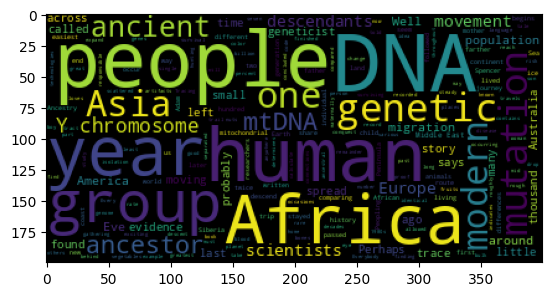

In [1]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import os
import matplotlib.pyplot as plt
nltk.download("punkt")

url = "https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt"
os.system("curl " + url + " > RE.ch05.txt")
#@markdown 🌀 read a text file in the server: as _text_
file = open("RE.ch05.txt")
text = file.read().replace("\n", " ")
file.close()

wc = WordCloud().generate(text)
plt.imshow(wc)

[nltk text](https://realpython.com/nltk-nlp-python/)

In [ ]:
#@markdown Wordcloud with your own text: Paste your text

#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Getting text from the user
user_text = input("Please paste your text here: ")


wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(user_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **⭐1. Tokenize  by words or sentences**
Token 표식
tokenize = 단어나 문장으로 나누는 것 = split


+ Tokenize by word
+ Tokenize by sentence

In [2]:
example_string = "My name is Sarah. I live in a big city. I like to read books and play with my cat."

In [3]:
set1 = example_string.split()
print(set1)

['My', 'name', 'is', 'Sarah.', 'I', 'live', 'in', 'a', 'big', 'city.', 'I', 'like', 'to', 'read', 'books', 'and', 'play', 'with', 'my', 'cat.']


In [4]:
set2 = example_string.split(".")
set2


['My name is Sarah',
 ' I live in a big city',
 ' I like to read books and play with my cat',
 '']

.으로 나누면 두세번째문장에서 스페이스 포함되고 마지막 . 뒤의 엠티까지 스트링으로 인식되는 문제 발생


In [5]:
# Strip()

set3 = [s.strip() for s in set2]
set3

['My name is Sarah',
 'I live in a big city',
 'I like to read books and play with my cat',
 '']

strip 함수 - 불필요한거 없애는
for

In [6]:
# Remove empty string in a list

set4 = [x for x in set3 if x != ""]
set4

['My name is Sarah',
 'I live in a big city',
 'I like to read books and play with my cat']

set3의 맨 마지막 string제거 위해서
x 변수이름, in ㅇㅇ: ㅇㅇ에 있는 x에 대해서
!= ~이 아니면
== ~이면

## **Using {nltk} library**

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [14]:
import nltk
nltk.download('punkt')
#Tokenize 설치
slist = sent_tokenize(example_string)
slist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['My name is Sarah.',
 'I live in a big city.',
 'I like to read books and play with my cat.']

[sample text to copy](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt)

In [19]:
mytext=input("Paste text: ")
slist1 = sent_tokenize(mytext)
slist1[30]

Paste text: The DNA trail Everybody loves a good story, and when it's finished, this may be the greatest one ever told. It begins in Africa with a group of people. There are perhaps just a few hundred, surviving by hunting animals and gathering fruits, vegetables, and nuts. It ends about 200,000 years later, with their seven billion descendants spread across the Earth.  In between is an exciting tale of survival, movement, isolation, and conquest, most of it occurring before recorded history. Who were those first modern people in Africa? What routes did they take when they left their home continent to expand into Europe and Asia? When and how did humans reach the Americas? For decades, the only proof was found in a small number of scattered bones and artifacts that our ancestors had left behind. In the past 20 years, however, DNA technologies have allowed scientists to find a record of ancient human migrations in the DNA of living people.  Tracing Ancestry in DNA.  "Every drop of human

'What seems certain is that at a remarkably recent date -- probably between 50,000 and 70,000 years ago -- one small group of people, the ancestors of modern humans outside of Africa, left Africa for western Asia.'

In [17]:
mywords = word_tokenize(mytext)
print(len(mywords))
mywords[100]

967


'modern'

# **⭐2. Filtering stopwords**

**Stopwords**

Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

Here’s how to import the relevant parts of NLTK in order to filter out stop words:

In [23]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sample = "Sir, I protest. I am not a merry man!"
s1 = word_tokenize(sample);
s1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

word tokenize 하면 붙어있는 문자에다 마침표까지 인식해줌

In [26]:
stop_words = set(stopwords.words("english"))

In [25]:
# string.casefold(): to all lower case so that we can compare strings

w1 = "Mary"
w2 = "susan"
w1.casefold()

'mary'

casefold = lower 함수 (소문자로 바꿔줌)

In [27]:
# Remove punctuations and stopwords

filtered_list = []

for word in s1:
   if (word.casefold() not in stop_words) & (len(word)>1):
        filtered_list.append(word)

filtered_list

['Sir', 'protest', 'merry', 'man']

stopwords가 정해져잇나봄 . I, am not a 가 빠짐

Test wordclouds with / without stopwords

[sample text](https://raw.githubusercontent.com/MK316/Spring2023/main/DL/story1.txt)

Please paste your text here: me, there was a kind and adventurous boy named Jack. Jack loved exploring and going on exciting adventures. One day, Jack decided to go on a hike in the nearby forest. As he was walking, he heard a soft meowing sound.  Jack followed the sound and found a small, black kitten. The kitten was scared and alone. Jack picked up the kitten and carried her in his arms. He decided to take her home and give her a warm place to sleep and plenty of food to eat.  Jack named the kitten Luna, and she quickly became his best friend. They did everything together, playing in the park, exploring the woods, and snuggling up together to watch movies at night.  One day, Jack and Luna went on a hike and got lost. They wandered deeper and deeper into the woods, but they couldn't find their way back. Jack started to worry, but Luna stayed by his side, meowing softly to comfort him.  As they continued to wander, they stumbled upon a clearing where an old man was sitting by a campfir

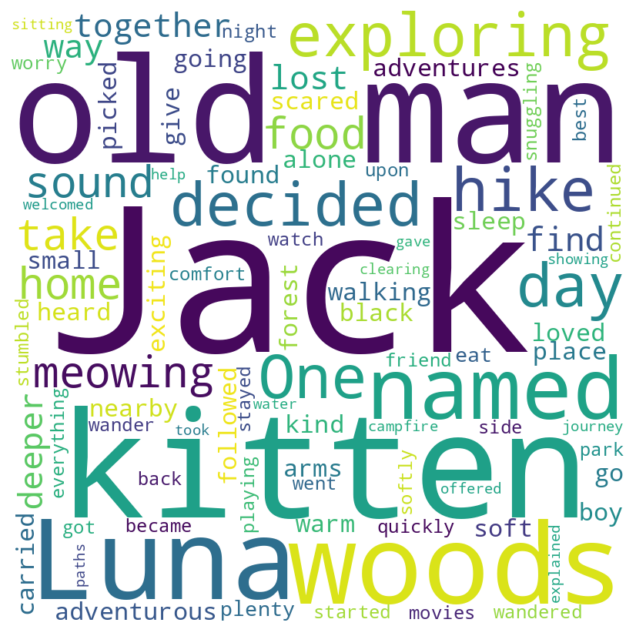

In [28]:
#@markdown Wordcloud with your own text: Paste your text

#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Getting text from the user
user_text = input("Please paste your text here: ")


wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(user_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
text1 = """
Once upon a time, there was a kind and adventurous boy named Jack. Jack loved exploring and going on exciting adventures. One day, Jack decided to go on a hike in the nearby forest. As he was walking, he heard a soft meowing sound.

Jack followed the sound and found a small, black kitten. The kitten was scared and alone. Jack picked up the kitten and carried her in his arms. He decided to take her home and give her a warm place to sleep and plenty of food to eat.

Jack named the kitten Luna, and she quickly became his best friend. They did everything together, playing in the park, exploring the woods, and snuggling up together to watch movies at night.

One day, Jack and Luna went on a hike and got lost. They wandered deeper and deeper into the woods, but they couldn't find their way back. Jack started to worry, but Luna stayed by his side, meowing softly to comfort him.

As they continued to wander, they stumbled upon a clearing where an old man was sitting by a campfire. The old man welcomed them and gave them food and water. Jack explained that they were lost, and the old man offered to help them find their way home.

The old man took them on a journey through the woods, showing them which paths to take and which to avoid. Finally, they arrived back at Jack's house, safe and sound.

From that day forward, Jack and Luna never went on another adventure without the old man's guidance. They were grateful to have each other and to have made a new friend who could help them when they needed it most.
"""

In [30]:
w1 = word_tokenize(text1)
stop_words = set(stopwords.words('english'))

w2 = [w for w in w1 if w.lower() not in stop_words and len(w) > 2] #w1단어중-stopwords빼고길이제한
w2

['upon',
 'time',
 'kind',
 'adventurous',
 'boy',
 'named',
 'Jack',
 'Jack',
 'loved',
 'exploring',
 'going',
 'exciting',
 'adventures',
 'One',
 'day',
 'Jack',
 'decided',
 'hike',
 'nearby',
 'forest',
 'walking',
 'heard',
 'soft',
 'meowing',
 'sound',
 'Jack',
 'followed',
 'sound',
 'found',
 'small',
 'black',
 'kitten',
 'kitten',
 'scared',
 'alone',
 'Jack',
 'picked',
 'kitten',
 'carried',
 'arms',
 'decided',
 'take',
 'home',
 'give',
 'warm',
 'place',
 'sleep',
 'plenty',
 'food',
 'eat',
 'Jack',
 'named',
 'kitten',
 'Luna',
 'quickly',
 'became',
 'best',
 'friend',
 'everything',
 'together',
 'playing',
 'park',
 'exploring',
 'woods',
 'snuggling',
 'together',
 'watch',
 'movies',
 'night',
 'One',
 'day',
 'Jack',
 'Luna',
 'went',
 'hike',
 'got',
 'lost',
 'wandered',
 'deeper',
 'deeper',
 'woods',
 'could',
 "n't",
 'find',
 'way',
 'back',
 'Jack',
 'started',
 'worry',
 'Luna',
 'stayed',
 'side',
 'meowing',
 'softly',
 'comfort',
 'continued',
 'wan

불용어 더 추가

In [31]:
additional_stopwords = {'one', 'day', 'upon'}

# Create a new set of stopwords that includes the default stopwords and the additional ones
stop_words = set(stopwords.words('english') + list(additional_stopwords))

In [32]:
w1 = word_tokenize(text1)
stop_words = set(stopwords.words('english') + list(additional_stopwords))

w2 = [w for w in w1 if w.lower() not in stop_words and len(w) > 2]
w2

['time',
 'kind',
 'adventurous',
 'boy',
 'named',
 'Jack',
 'Jack',
 'loved',
 'exploring',
 'going',
 'exciting',
 'adventures',
 'Jack',
 'decided',
 'hike',
 'nearby',
 'forest',
 'walking',
 'heard',
 'soft',
 'meowing',
 'sound',
 'Jack',
 'followed',
 'sound',
 'found',
 'small',
 'black',
 'kitten',
 'kitten',
 'scared',
 'alone',
 'Jack',
 'picked',
 'kitten',
 'carried',
 'arms',
 'decided',
 'take',
 'home',
 'give',
 'warm',
 'place',
 'sleep',
 'plenty',
 'food',
 'eat',
 'Jack',
 'named',
 'kitten',
 'Luna',
 'quickly',
 'became',
 'best',
 'friend',
 'everything',
 'together',
 'playing',
 'park',
 'exploring',
 'woods',
 'snuggling',
 'together',
 'watch',
 'movies',
 'night',
 'Jack',
 'Luna',
 'went',
 'hike',
 'got',
 'lost',
 'wandered',
 'deeper',
 'deeper',
 'woods',
 'could',
 "n't",
 'find',
 'way',
 'back',
 'Jack',
 'started',
 'worry',
 'Luna',
 'stayed',
 'side',
 'meowing',
 'softly',
 'comfort',
 'continued',
 'wander',
 'stumbled',
 'clearing',
 'old',
 

# Tagging Parts of Speech

태깅 = 문장 내 품사 구별

In [33]:
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

sentence = input("Type your sentence: ")
mywords = word_tokenize(sentence)
nltk.pos_tag(mywords)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Type your sentence: Once upon a time, there was a kind and adventurous boy named Jack. Jack loved exploring and going on exciting adventures. One day, Jack decided to go on a hike in the nearby forest. As he was walking, he heard a soft meowing sound.  Jack followed the sound and found a small, black kitten. The kitten was scared and alone. Jack picked up the kitten and carried her in his arms. He decided to take her home and give her a warm place to sleep and plenty of food to eat.  Jack named the kitten Luna, and she quickly became his best friend. They did everything together, playing in the park, exploring the woods, and snuggling up together to watch movies at night.  One day, Jack and Luna went on a hike and got lost. They wandered deeper and deeper into the woods, but they couldn't find their way back. Jack started to worry, but Luna stayed by his side, meowing softly to comfort him.  As they continued to wander, they stumbled upon a clearing where an old man was sitting by a ca

[('Once', 'RB'),
 ('upon', 'IN'),
 ('a', 'DT'),
 ('time', 'NN'),
 (',', ','),
 ('there', 'EX'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('kind', 'NN'),
 ('and', 'CC'),
 ('adventurous', 'JJ'),
 ('boy', 'NN'),
 ('named', 'VBN'),
 ('Jack', 'NNP'),
 ('.', '.'),
 ('Jack', 'NNP'),
 ('loved', 'VBD'),
 ('exploring', 'VBG'),
 ('and', 'CC'),
 ('going', 'VBG'),
 ('on', 'IN'),
 ('exciting', 'VBG'),
 ('adventures', 'NNS'),
 ('.', '.'),
 ('One', 'CD'),
 ('day', 'NN'),
 (',', ','),
 ('Jack', 'NNP'),
 ('decided', 'VBD'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('hike', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('nearby', 'JJ'),
 ('forest', 'NN'),
 ('.', '.'),
 ('As', 'IN'),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('walking', 'VBG'),
 (',', ','),
 ('he', 'PRP'),
 ('heard', 'VBD'),
 ('a', 'DT'),
 ('soft', 'JJ'),
 ('meowing', 'NN'),
 ('sound', 'NN'),
 ('.', '.'),
 ('Jack', 'NNP'),
 ('followed', 'VBD'),
 ('the', 'DT'),
 ('sound', 'NN'),
 ('and', 'CC'),
 ('found', 'VBD'),
 ('a', 'DT'),
 ('small', 'JJ'),

In [34]:
nltk.download('tagsets')
# nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [35]:
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [36]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

[sample text](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt)

In [ ]:
import nltk

# Define some plain text
text = input("Paste your text: ")

# Tokenize the text into a list of words
tokens = nltk.word_tokenize(text)

# Create an nltk.Text object from the list of tokens
text_object = nltk.Text(tokens)

# Use the concordance method to find occurrences of the word "fox"
text_object.concordance("be")

Paste your text: The DNA trail Everybody loves a good story, and when it's finished, this may be the greatest one ever told. It begins in Africa with a group of people. There are perhaps just a few hundred, surviving by hunting animals and gathering fruits, vegetables, and nuts. It ends about 200,000 years later, with their seven billion descendants spread across the Earth.  In between is an exciting tale of survival, movement, isolation, and conquest, most of it occurring before recorded history. Who were those first modern people in Africa? What routes did they take when they left their home continent to expand into Europe and Asia? When and how did humans reach the Americas? For decades, the only proof was found in a small number of scattered bones and artifacts that our ancestors had left behind. In the past 20 years, however, DNA technologies have allowed scientists to find a record of ancient human migrations in the DNA of living people.  Tracing Ancestry in DNA.  "Every drop of 

# Frequency list (next lesson)